# Births rate analysis (US)

The dataset includes birth rates by date in the United States from 1969 to 2008.

We clean data and convert the date to group by day of the week and get the mean values.
We represent a graph averaging the number of births for each day of the week in the the 60s, 70s and 80s decades.

In [1]:
import numpy as np
import pandas as pd
import births_py as bpy
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Loadind data

In [2]:
births = pd.read_csv("births.csv")
print('dataset size:', births.shape)
# show the beginning of the file
births.head(n=10)

dataset size: (15547, 5)


,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
5,1969,1,3.0,M,4994
6,1969,1,4.0,F,4440
7,1969,1,4.0,M,4520
8,1969,1,5.0,F,4192
9,1969,1,5.0,M,4198


In [3]:
# to detect the outliers
births.describe(include="all")

,year,month,day,gender,births
count,15547.000000,15547.000000,15067.000000,15547,15547.000000
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,F,NaN
freq,NaN,NaN,NaN,7776,NaN
mean,1979.037435,6.515919,17.769894,NaN,9762.293561
std,6.728340,3.449632,15.284034,NaN,28552.465810
min,1969.000000,1.000000,1.000000,NaN,1.000000
25%,1974.000000,4.000000,8.000000,NaN,4358.000000
50%,1979.000000,7.000000,16.000000,NaN,4814.000000
75%,1984.000000,10.000000,24.000000,NaN,5289.500000


Some aberrations appear, such as the max value of births and the max value of day '99'.
Let's look variable by variable and clean the data all along.

# Date data checking

## 1) Year variable 

In [4]:
births['year'].describe()

count    15547.000000
mean      1979.037435
std          6.728340
min       1969.000000
25%       1974.000000
50%       1979.000000
75%       1984.000000
max       2008.000000
Name: year, dtype: float64

Text(0.5, 1.0, 'Number of birth data per year')

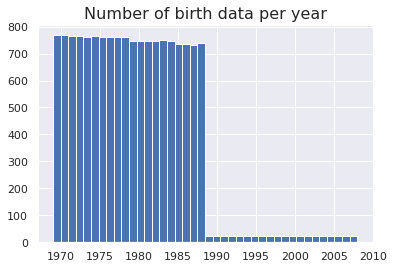

In [5]:
# plot the amount of data for each year
plt.hist(births['year'],bins=len(pd.unique(births['year'])))
plt.title('Number of birth data per year', fontsize=16)

There is too few data from 1989, it will be removed.

## 2) Month variable

In [6]:
births["month"].describe()

count    15547.000000
mean         6.515919
std          3.449632
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

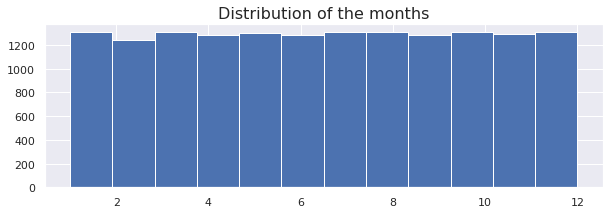

In [7]:
births["month"].hist(bins=12, figsize=(10,3)) 
plt.title("Distribution of the months", fontsize=16);

The month variable is ok

## 3) Day variable

In [8]:
births['day'].describe()

count    15067.000000
mean        17.769894
std         15.284034
min          1.000000
25%          8.000000
50%         16.000000
75%         24.000000
max         99.000000
Name: day, dtype: float64

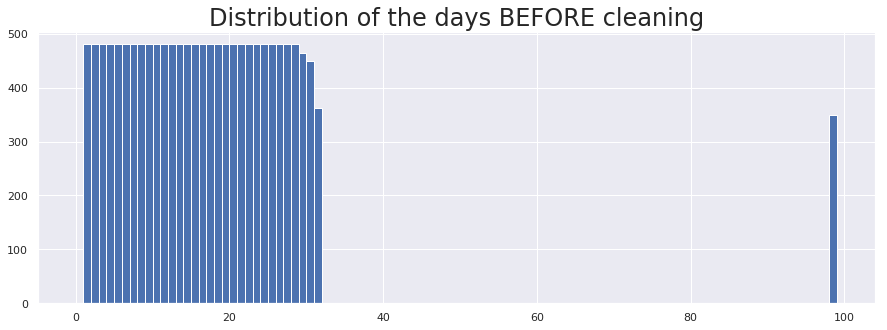

In [9]:
births['day'].hist(bins=range(100), figsize=(15,5)) 
plt.title("Distribution of the days BEFORE cleaning", fontsize=24);

The 99 value is outlier and it will be removed.

# Cleaning data

## 1) Date

We first remove the NaN values, which can possibly fix others outliers.

In [10]:
# remove the NAN values
births_clean = bpy.remove_nan_entries(births)

Initial dataset size:  (15547, 5)


,year,month,day,gender,births
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235



Removing the NaN values...


,year,month,day,gender,births
15062,1988,12,29.0,M,5944
15063,1988,12,30.0,F,5742
15064,1988,12,30.0,M,6095
15065,1988,12,31.0,F,4435
15066,1988,12,31.0,M,4698



Dataset size after NaN removing:  (15067, 5)
=> 3% reduction of data.


In [11]:
# remove 99 days and the years > 1989
births_clean = bpy.remove_outliers_date(births_clean) 

Initial dataset size:  (15067, 5)


,year,month,day,gender,births
62,1969,1,99.0,F,26
63,1969,1,99.0,M,38
126,1969,2,99.0,F,42
127,1969,2,99.0,M,48
190,1969,3,99.0,F,64


Removing the 99 days...
Dataset size after cleaning:  (14717, 5)
=> 2% reduction of data.

Removing years > 1989...
Dataset size after cleaning:  (14717, 5)
=> 0% reduction of data.


## 2) Number of births 

In [12]:
# before cleaning
births['births'].describe()

count    14717.000000
mean      4789.463749
std        708.016776
min          1.000000
25%       4374.000000
50%       4807.000000
75%       5256.000000
max       6527.000000
Name: births, dtype: float64

In [13]:
births_clean['births'].describe()

count    14717.000000
mean      4789.463749
std        708.016776
min          1.000000
25%       4374.000000
50%       4807.000000
75%       5256.000000
max       6527.000000
Name: births, dtype: float64

After cleaning, the huge values have been removed but there still remain the low values.

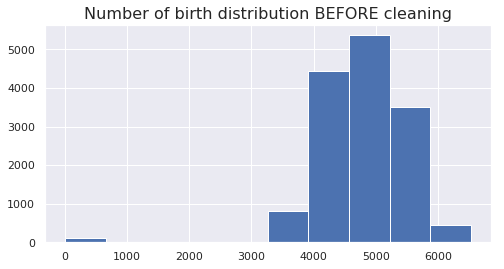

In [14]:
plt.figure(figsize=(8, 4))
births_clean['births'].hist()
plt.title("Number of birth distribution BEFORE cleaning", fontsize=16);

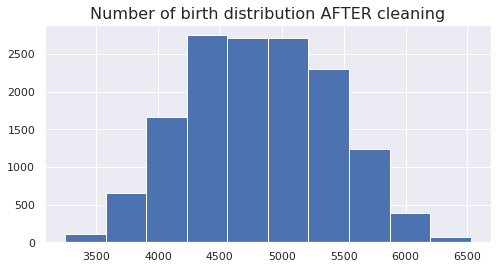

In [15]:
# remove the birth values under 1000
births_clean = births_clean[births_clean["births"] > 1000]

plt.figure(figsize=(8, 4))
births_clean["births"].hist();
plt.title("Number of birth distribution AFTER cleaning", fontsize=16);

In [16]:
red_per = 100*(len(births) - len(births_clean)) / len(births)
print("After total cleaning: %.0f%% reduction of data." % red_per)

After total cleaning: 1% reduction of data.


In [17]:
# check if there are  missing values
print(births_clean.isnull().any())
# check everything is alright
births_clean.describe()

year      False
month     False
day       False
gender    False
births    False
dtype: bool


,year,month,day,births
count,14610.000000,14610.000000,14610.000000,14610.000000
mean,1978.501027,6.522930,15.729637,4824.470089
std,5.766538,3.448821,8.800393,579.996983
min,1969.000000,1.000000,1.000000,3249.000000
25%,1974.000000,4.000000,8.000000,4383.000000
50%,1979.000000,7.000000,16.000000,4812.000000
75%,1984.000000,10.000000,23.000000,5259.000000
max,1988.000000,12.000000,31.000000,6527.000000


# Date conversion

In [18]:
births_clean = bpy.date_conversion(births_clean)

Initial dataset size:  (14610, 5)


,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


Date conversion...
Removing NaT...


,date,weekday,births,dayname
0,1969-01-01,2,4046,Wednesday
1,1969-01-01,2,4440,Wednesday
2,1969-01-02,3,4454,Thursday
3,1969-01-02,3,4548,Thursday
4,1969-01-03,4,4548,Friday


Final dataset size (14610, 4)


In [19]:
# build a DataFrame for each decade
data_60s = births_clean[births_clean['date'].dt.year < 1970]
data_70s = births_clean[(births_clean['date'].dt.year > 1969) & 
                 (births_clean['date'].dt.year < 1980)]
data_80s = births_clean[births_clean['date'].dt.year > 1979]

In [20]:
# Agregation (group by) and mean
for i in [60,70,80]:
    print("\nThe %ds :" % i)
    births = 'births_%ds' % i
    data = 'data_%ds' %i
    globals()[births] = bpy.get_grouped_mean(globals()[data], 'weekday')


The 60s :
Grouped by weekday.
Averaging the number of births for each day of the week...
weekday
0    5063.826923
1    5286.096154
2    5074.622642
3    4978.288462
4    5107.884615
5    4651.057692
6    4342.346154
Name: births, dtype: float64

The 70s :
Grouped by weekday.
Averaging the number of births for each day of the week...
weekday
0    4689.097701
1    4885.252399
2    4750.376200
3    4696.923372
4    4782.095785
5    4207.784483
6    3979.278736
Name: births, dtype: float64

The 80s :
Grouped by weekday.
Averaging the number of births for each day of the week...
weekday
0    5276.907249
1    5503.842553
2    5367.642553
3    5333.485106
4    5393.087234
5    4483.901064
6    4308.120469
Name: births, dtype: float64


# Plotting data

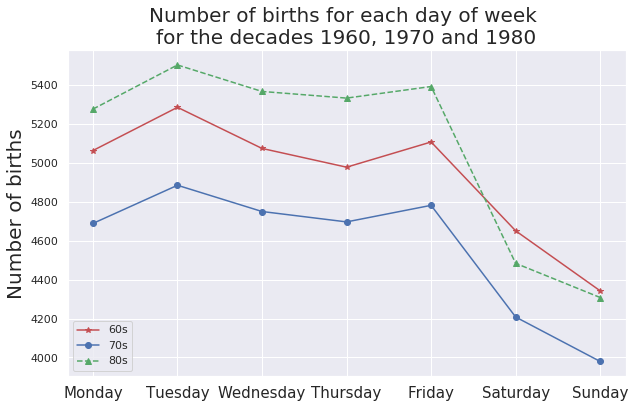

In [21]:
plt.figure(figsize=(10, 6))
t = np.arange(0,7,1)
plt.plot(t,births_60s,'r*-',label='60s')
plt.plot(t,births_70s,'bo-',label='70s')
plt.plot(t,births_80s,'g^--',label='80s')
plt.ylabel("Number of births", fontsize=20)
plt.xticks([0,1,2,3,4,5,6],
           ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], fontsize=15)
plt.legend(loc='lower left')
plt.title("Number of births for each day of week \nfor the decades 1960, 1970 and 1980", fontsize=20)

plt.show()

# Seaborn handling...

In [22]:
 def get_cat(x):
        if x < pd.Timestamp('1970-01-01'):
            return "60's"
        elif x < pd.Timestamp('1980-01-01'):
            return "70's"
        else:
            return "80's"

In [23]:
births_clean['decade'] = births_clean['date'].apply(get_cat)

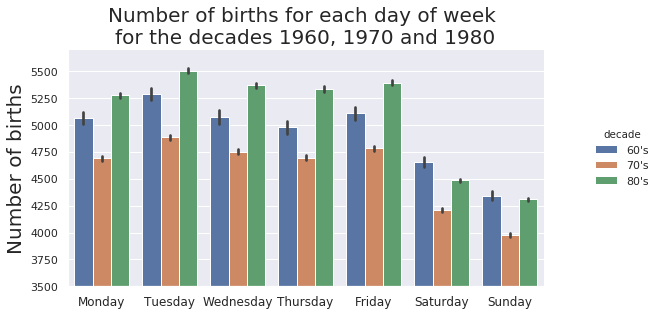

In [24]:
g = sns.catplot(x='weekday', y='births', 
                hue='decade', kind='bar', data=births_clean)
g.fig.set_figwidth(10)
g.fig.set_figheight(4)
plt.title("Number of births for each day of week \nfor the decades 1960, 1970 and 1980", fontsize=20)
plt.ylabel("Number of births", fontsize=20)
plt.xticks(ticks=[x for x in range(7)], 
           labels=["Monday","Tuesday","Wednesday",
                   "Thursday","Friday","Saturday","Sunday"], 
           fontsize=12)
g.set_axis_labels("", "Number of births")
plt.ylim((3500,5700))
plt.show()